In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
paragraph = """Cricket is a bat-and-ball game played between two teams of eleven players each.
It is a game rich in tradition and filled with excitement, where teams compete to outscore each other.
Great players like Virat Kohli, Sachin Tendulkar, and M.S. Dhoni have become legends.
Fans enjoy thrilling moments, unforgettable centuries, and historic victories."""

# 1-1
paragraph_lower = paragraph.lower()
paragraph_clean = re.sub(r'[^\w\s]', '', paragraph_lower)
print("Clean Paragraph:\n", paragraph_clean)

Clean Paragraph:
 cricket is a batandball game played between two teams of eleven players each 
it is a game rich in tradition and filled with excitement where teams compete to outscore each other 
great players like virat kohli sachin tendulkar and ms dhoni have become legends 
fans enjoy thrilling moments unforgettable centuries and historic victories


In [4]:
# 1-2
nltk.download('punkt_tab')
words_split = paragraph_clean.split()
words_tokenized = word_tokenize(paragraph_clean)
sentences_tokenized = sent_tokenize(paragraph)

print("\nWords using split():", words_split)
print("\nWords using word_tokenize():", words_tokenized)
print("\nSentences:", sentences_tokenized)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Words using split(): ['cricket', 'is', 'a', 'batandball', 'game', 'played', 'between', 'two', 'teams', 'of', 'eleven', 'players', 'each', 'it', 'is', 'a', 'game', 'rich', 'in', 'tradition', 'and', 'filled', 'with', 'excitement', 'where', 'teams', 'compete', 'to', 'outscore', 'each', 'other', 'great', 'players', 'like', 'virat', 'kohli', 'sachin', 'tendulkar', 'and', 'ms', 'dhoni', 'have', 'become', 'legends', 'fans', 'enjoy', 'thrilling', 'moments', 'unforgettable', 'centuries', 'and', 'historic', 'victories']

Words using word_tokenize(): ['cricket', 'is', 'a', 'batandball', 'game', 'played', 'between', 'two', 'teams', 'of', 'eleven', 'players', 'each', 'it', 'is', 'a', 'game', 'rich', 'in', 'tradition', 'and', 'filled', 'with', 'excitement', 'where', 'teams', 'compete', 'to', 'outscore', 'each', 'other', 'great', 'players', 'like', 'virat', 'kohli', 'sachin', 'tendulkar', 'and', 'ms', 'dhoni', 'have', 'become', 'legends', 'fans', 'enjoy', 'thrilling', 'moments', 'unforgettable', 'ce

In [5]:
# 1-3
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words_tokenized if w not in stop_words]
print("\nFiltered Words:", filtered_words)


Filtered Words: ['cricket', 'batandball', 'game', 'played', 'two', 'teams', 'eleven', 'players', 'game', 'rich', 'tradition', 'filled', 'excitement', 'teams', 'compete', 'outscore', 'great', 'players', 'like', 'virat', 'kohli', 'sachin', 'tendulkar', 'ms', 'dhoni', 'become', 'legends', 'fans', 'enjoy', 'thrilling', 'moments', 'unforgettable', 'centuries', 'historic', 'victories']



Word Frequencies:
cricket: 1
batandball: 1
game: 2
played: 1
two: 1
teams: 2
eleven: 1
players: 2
rich: 1
tradition: 1
filled: 1
excitement: 1
compete: 1
outscore: 1
great: 1
like: 1
virat: 1
kohli: 1
sachin: 1
tendulkar: 1
ms: 1
dhoni: 1
become: 1
legends: 1
fans: 1
enjoy: 1
thrilling: 1
moments: 1
unforgettable: 1
centuries: 1
historic: 1
victories: 1


<Axes: xlabel='Samples', ylabel='Counts'>

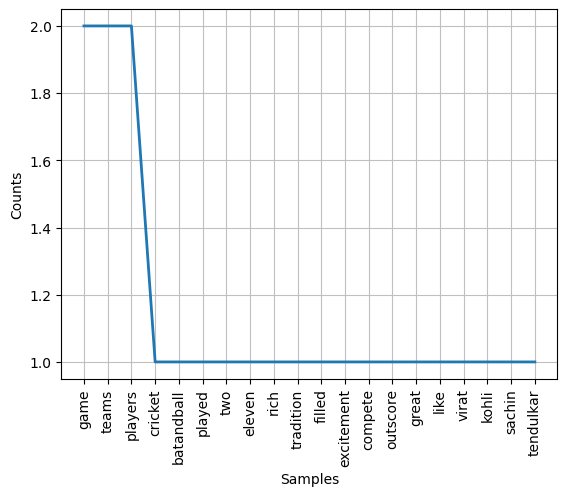

In [6]:
# 1-4
fdist = nltk.FreqDist(filtered_words)
print("\nWord Frequencies:")
for word, freq in fdist.items():
    print(f"{word}: {freq}")

fdist.plot(20)

In [8]:
# 2
only_alpha_words = re.findall(r'\b[a-zA-Z]+\b', paragraph)
print("\nOnly alphabet words:", only_alpha_words)

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in only_alpha_words if w not in stop_words]
print("\nFiltered Words:", filtered_words)

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming
porter_stemmed = [porter.stem(word) for word in filtered_words]

# Lemmatization
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]

for original, stemmed, lemmatized in zip(filtered_words, porter_stemmed, lemmatized):
    print(f"Original: {original:<15} | Stemmed: {stemmed:<15} | Lemmatized: {lemmatized:<15}")


Only alphabet words: ['Cricket', 'is', 'a', 'bat', 'and', 'ball', 'game', 'played', 'between', 'two', 'teams', 'of', 'eleven', 'players', 'each', 'It', 'is', 'a', 'game', 'rich', 'in', 'tradition', 'and', 'filled', 'with', 'excitement', 'where', 'teams', 'compete', 'to', 'outscore', 'each', 'other', 'Great', 'players', 'like', 'Virat', 'Kohli', 'Sachin', 'Tendulkar', 'and', 'M', 'S', 'Dhoni', 'have', 'become', 'legends', 'Fans', 'enjoy', 'thrilling', 'moments', 'unforgettable', 'centuries', 'and', 'historic', 'victories']

Filtered Words: ['Cricket', 'bat', 'ball', 'game', 'played', 'two', 'teams', 'eleven', 'players', 'It', 'game', 'rich', 'tradition', 'filled', 'excitement', 'teams', 'compete', 'outscore', 'Great', 'players', 'like', 'Virat', 'Kohli', 'Sachin', 'Tendulkar', 'M', 'S', 'Dhoni', 'become', 'legends', 'Fans', 'enjoy', 'thrilling', 'moments', 'unforgettable', 'centuries', 'historic', 'victories']
Original: Cricket         | Stemmed: cricket         | Lemmatized: Cricket  

In [9]:
# 3
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "Virat Kohli scores another century in IPL.",
    "Artificial Intelligence is transforming industries.",
    "Healthy food boosts immunity and health."
]

# Bag of Words
cv = CountVectorizer()
X_bow = cv.fit_transform(texts)
print("Bag of Words Matrix:\n", X_bow.toarray())

# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(texts)

feature_names = tfidf.get_feature_names_out()

for i, text in enumerate(texts):
    print(f"\nTop keywords for text {i+1}:")
    scores = zip(feature_names, X_tfidf[i].toarray()[0])
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for word, score in sorted_scores[:3]:
        print(f"{word}: {score:.4f}")


Bag of Words Matrix:
 [[0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0]
 [1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0]]

Top keywords for text 1:
another: 0.3780
century: 0.3780
in: 0.3780

Top keywords for text 2:
artificial: 0.4472
industries: 0.4472
intelligence: 0.4472

Top keywords for text 3:
and: 0.4082
boosts: 0.4082
food: 0.4082


In [10]:
# 4
from sklearn.metrics.pairwise import cosine_similarity

tech1 = """Artificial Intelligence (AI) and Machine Learning: These technologies are employed to analyze vast datasets, improve investment predictions, automate signal discovery, and enhance portfolio construction. AI helps reduce information asymmetry and provides more accurate forecasts than traditional human analysis."""
tech2 = """High-Frequency Trading (HFT) Technology: This involves ultra-fast algorithmic trading systems that execute large numbers of trades at very high speeds, leveraging low-latency networks and advanced coding to capitalize on small market inefficiencies. It requires specialized infrastructure and technical expertise."""

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

tokens1 = preprocess_text(tech1)
tokens2 = preprocess_text(tech2)

t1_set = set(tokens1)
t2_set = set(tokens2)
intersection = t1_set.intersection(t2_set)
union = t1_set.union(t2_set)
jaccard_sim = len(intersection) / len(union)

print(f"\nJaccard Similarity: {jaccard_sim:.4f}")

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([tech1, tech2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

print(f"Cosine Similarity: {cosine_sim:.4f}")


Jaccard Similarity: 0.0000
Cosine Similarity: 0.0820



Polarity: 0.25858585858585853
Subjectivity: 0.5476010101010101
Sentiment: Positive


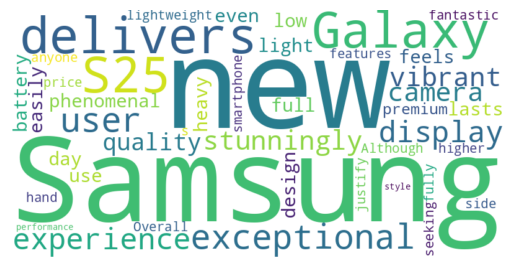

In [12]:
# 5
from wordcloud import WordCloud
from textblob import TextBlob

review = "The new Samsung Galaxy S25 delivers an exceptional user experience. The display is stunningly vibrant, the camera quality is phenomenal even in low light, and the battery easily lasts a full day with heavy use. The design feels premium and lightweight in hand. Although the price is on the higher side, the features fully justify it. Overall, it’s a fantastic smartphone for anyone seeking performance and style."

blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print("\nPolarity:", polarity)
print("Subjectivity:", subjectivity)

if polarity > 0:
    sentiment = "Positive"
elif polarity < 0:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print("Sentiment:", sentiment)

# Wordcloud if Positive
if sentiment == "Positive":
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [15]:
!pip install tensorflow
!pip install keras

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [18]:
# 6
training_text = """Space exploration represents humanity's greatest adventure beyond our home planet.
Astronauts circle Earth in orbiting stations while robotic probes venture to distant planets.
Recent missions have discovered evidence of water on Mars and mysterious oceans on moons of Jupiter.
Private companies now launch rockets alongside government agencies, making space more accessible.
The dream of establishing colonies on other worlds continues to inspire scientists and engineers worldwide."""

# 6-1
tokenizer = Tokenizer()
tokenizer.fit_on_texts([training_text])

total_words = len(tokenizer.word_index) + 1
print(f"Total unique words: {total_words}")

Total unique words: 60


In [20]:
# 6-2
input_sequences = []
for line in training_text.split('.'):
    if len(line.strip()) > 0:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            input_sequences.append(token_list[:i+1])


max_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

X, y = input_sequences[:,:-1], input_sequences[:,-1]
X
y

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23,
       24,  4, 25, 26, 28, 29, 30, 31,  1, 32,  2, 33,  5, 34, 35,  2, 36,
        1, 37, 39, 40, 41, 42, 43, 44, 45, 46,  3, 47, 48, 50,  1, 51, 52,
        2, 53, 54, 55,  4, 56, 57,  5, 58, 59], dtype=int32)

In [21]:
# 6-3
model = Sequential()
model.add(Embedding(total_words, 16, input_length=max_len-1))
model.add(LSTM(128))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=100, verbose=1)

def generate_text(seed_text, next_words, model, max_len, tokenizer):
    generated_text = seed_text

    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        seed_text += " " + output_word

    return seed_text

seed_text = "Space exploration"
generated_text = generate_text(seed_text, 20, model, max_len, tokenizer)
print("\nGenerated text:")
print(generated_text)

seed_text = "Astronauts"
generated_text = generate_text(seed_text, 20, model, max_len, tokenizer)
print("\nGenerated text:")
print(generated_text)

seed_text = "The dream"
generated_text = generate_text(seed_text, 20, model, max_len, tokenizer)
print("\nGenerated text:")
print(generated_text)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.0000e+00 - loss: 4.0957
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0432 - loss: 4.0914
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0536 - loss: 4.0875
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0432 - loss: 4.0845 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0427 - loss: 4.0796
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0427 - loss: 4.0735 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0323 - loss: 4.0681 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0432 - loss: 4.0570
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0432 - loss: 4.0393
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0328 - loss: 4.0269    
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0640 - loss: 3.9772
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0536 - los